## **NAME: APOORV DHAYGUDE**

# **Abstract**

This notebook aims to help you understand the process of creating and training a simple neural network that can classify handwritten numbers from the TMNIST Alphabet (94 characters) dataset.

# **Introduction about the dataset**

Typography MNIST (TMNIST)

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

## **About the Dataset**

It is based on the MNIST database but with a focus on typeface rather than handwritten digits.

Content: The dataset comprises images of digits (0-9), but these are generated using a variety of 2,990 Google font files. This variety introduces a broad spectrum of typeface styles for each digit.

### **Dataset Structure:**

- File Name: 94_character_TMNIST.csv.
- Dataset Size: It contains 29,900 examples.
- Row Structure: Each row in the CSV file has 786 elements.
- The first element is the font name, indicating which Google font was used to generate the digit.
- The second element is the label, which is a digit from 0-9.
- The remaining 784 elements are grayscale pixel values (ranging from 0 to 255) representing a 28x28 pixel image of the digit.

In [149]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


In [150]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install seaborn

Importing necessary libraries

In [126]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [127]:
# Load the dataset
dataset = '/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv'
df = pd.read_csv(dataset)


In [128]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
#Displaying unique values in "labels"column and counting the number of unique classes
print(df['labels'].unique())
no_of_classes=df['labels'].nunique()
print('Classes :',no_of_classes)

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
Classes : 94


In [130]:
# dropping label columns 
X = df.drop(columns=['labels']) 
y = df['labels']

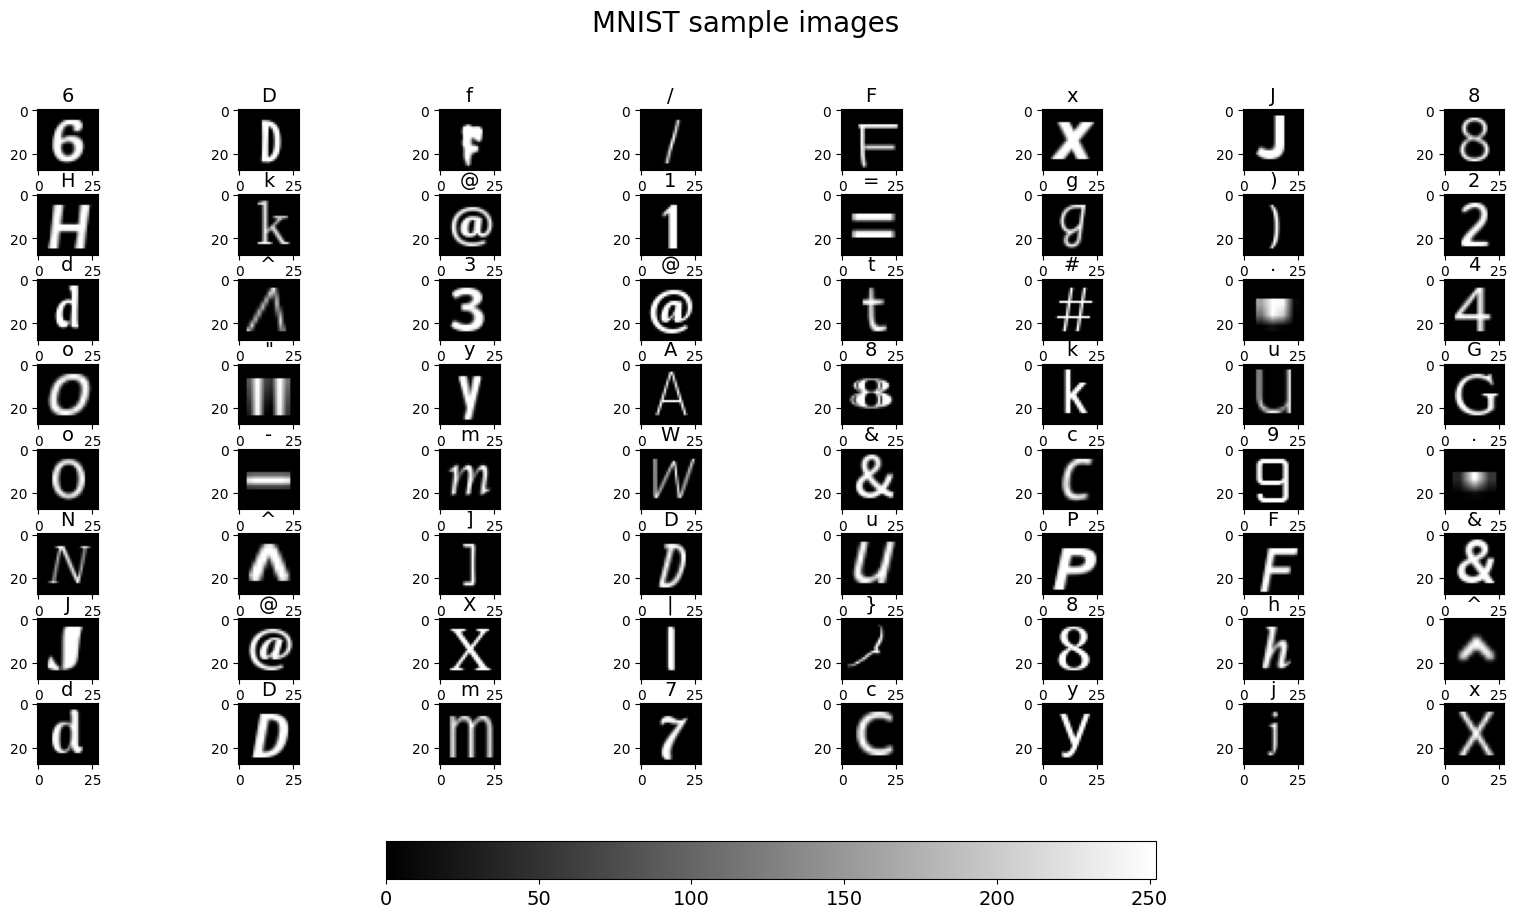

In [131]:
# Assuming the first column ('label') needs to be excluded from X before reshaping
X_pixels = X.iloc[:, 1:]  # This excludes the first column, adjust accordingly if the extra column is not the first one

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 10))
fig.suptitle("MNIST sample images", fontsize=20)

for i, ax in enumerate(axes.flat):
    # Use X_pixels for reshaping
    img = ax.imshow(X_pixels.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(str(y.iloc[i]), fontsize=14)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
# Adjusting colorbar creation to be compatible with subplots
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.1)
cbar.ax.tick_params(labelsize=14)

plt.show()

The script removes the first column from the data and then shows an 8x8 grid of example photos from the MNIST dataset. Each 28 × 28 pixel grayscale image has a label above it that corresponds to it. The grayscale intensity is displayed at the bottom using a colorbar. A sizable plot named "MNIST sample images" displaying a variety of handwritten characters and symbols along with their labels would be the final product.

In [132]:
#train and test data split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=32,stratify=y)

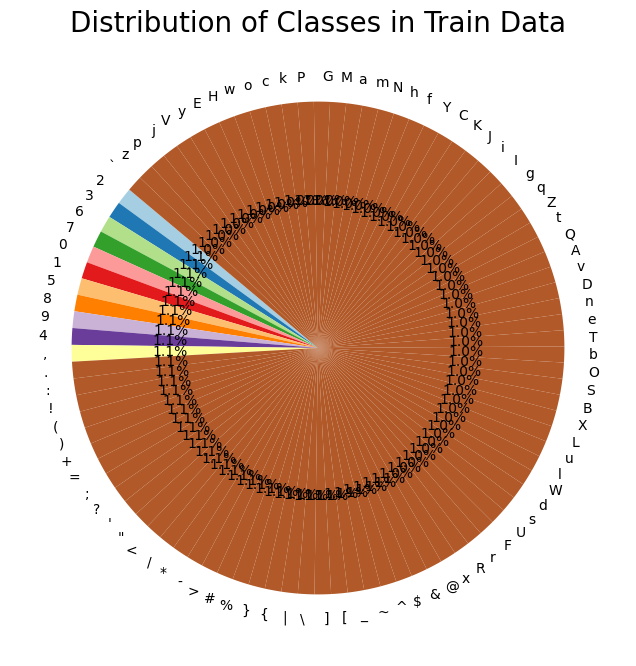

In [133]:
# Calculate counts and labels for the pie chart
counts = y_train.value_counts()
labels = counts.index

# Define colors for each class
colors = plt.cm.Paired(range(len(labels)))

# Create the pie chart
plt.figure(figsize=(10, 8))  # Adjust the figure size to better fit the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Classes in Train Data', fontsize=20)

# Show the plot
plt.show()

The code mentioned above is intended to display the distribution of various classes in a training dataset, most likely with an emphasis on labeled character recognition. After determining how frequently each class occurs in the y_train dataset, a pie chart with one "slice" for each class is produced. Every slice has a unique color, and the size of each slice indicates how frequently that class occurs in relation to the others. In order to place the initial slice, the chart begins at a 140-degree angle on the circle. The chart is titled "Class Distribution in Train Data" and is displayed with a large text size to make it stand out. When this code runs, a pie chart will be created, making it possible to quickly and visually analyze if classes are balanced or not in the training data

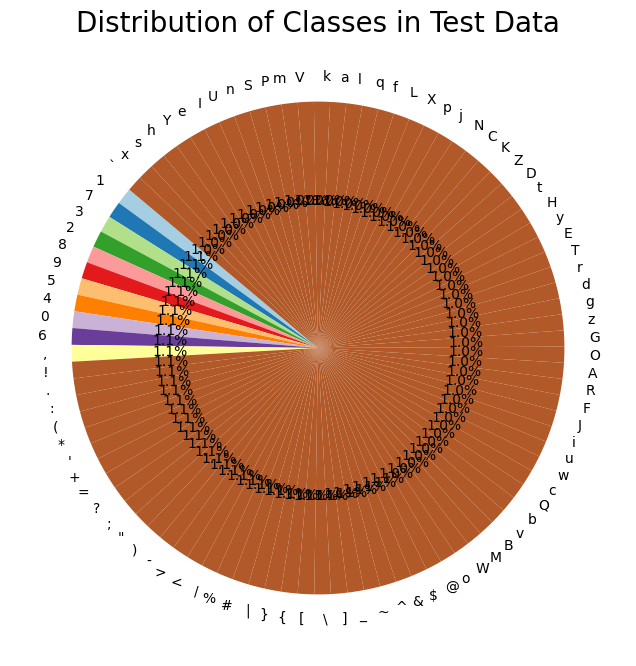

In [134]:
# Calculate counts and labels for the pie chart
counts = y_test.value_counts()
labels = counts.index

# Define colors for each class
colors = plt.cm.Paired(range(len(labels)))

# Create the pie chart
plt.figure(figsize=(10, 8))  # Adjust the figure size to better fit the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Classes in Test Data', fontsize=20)

# Show the plot
plt.show()

The code mentioned above is intended to display the distribution of several classes in a test dataset, most likely with an emphasis on labeled character recognition. After determining how frequently each class occurs in the y_test dataset, a pie chart with one "slice" for each class is produced. Every slice has a unique color, and the size of each slice indicates how frequently that class occurs in relation to the others. In order to place the initial slice, the chart begins at a 140-degree angle on the circle. The chart is titled "Class Distribution in Test Data" and is displayed with a large text size to make it stand out. When this code runs, a pie chart will be created, making it possible to quickly and visually analyze if classes are balanced or not in the test data.

In [135]:
#Data Preprocessing

# Example using select_dtypes to exclude non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])

# Example converting columns to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# You may then want to handle NaNs, for example by filling them with zeros, the column mean, or dropping them
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

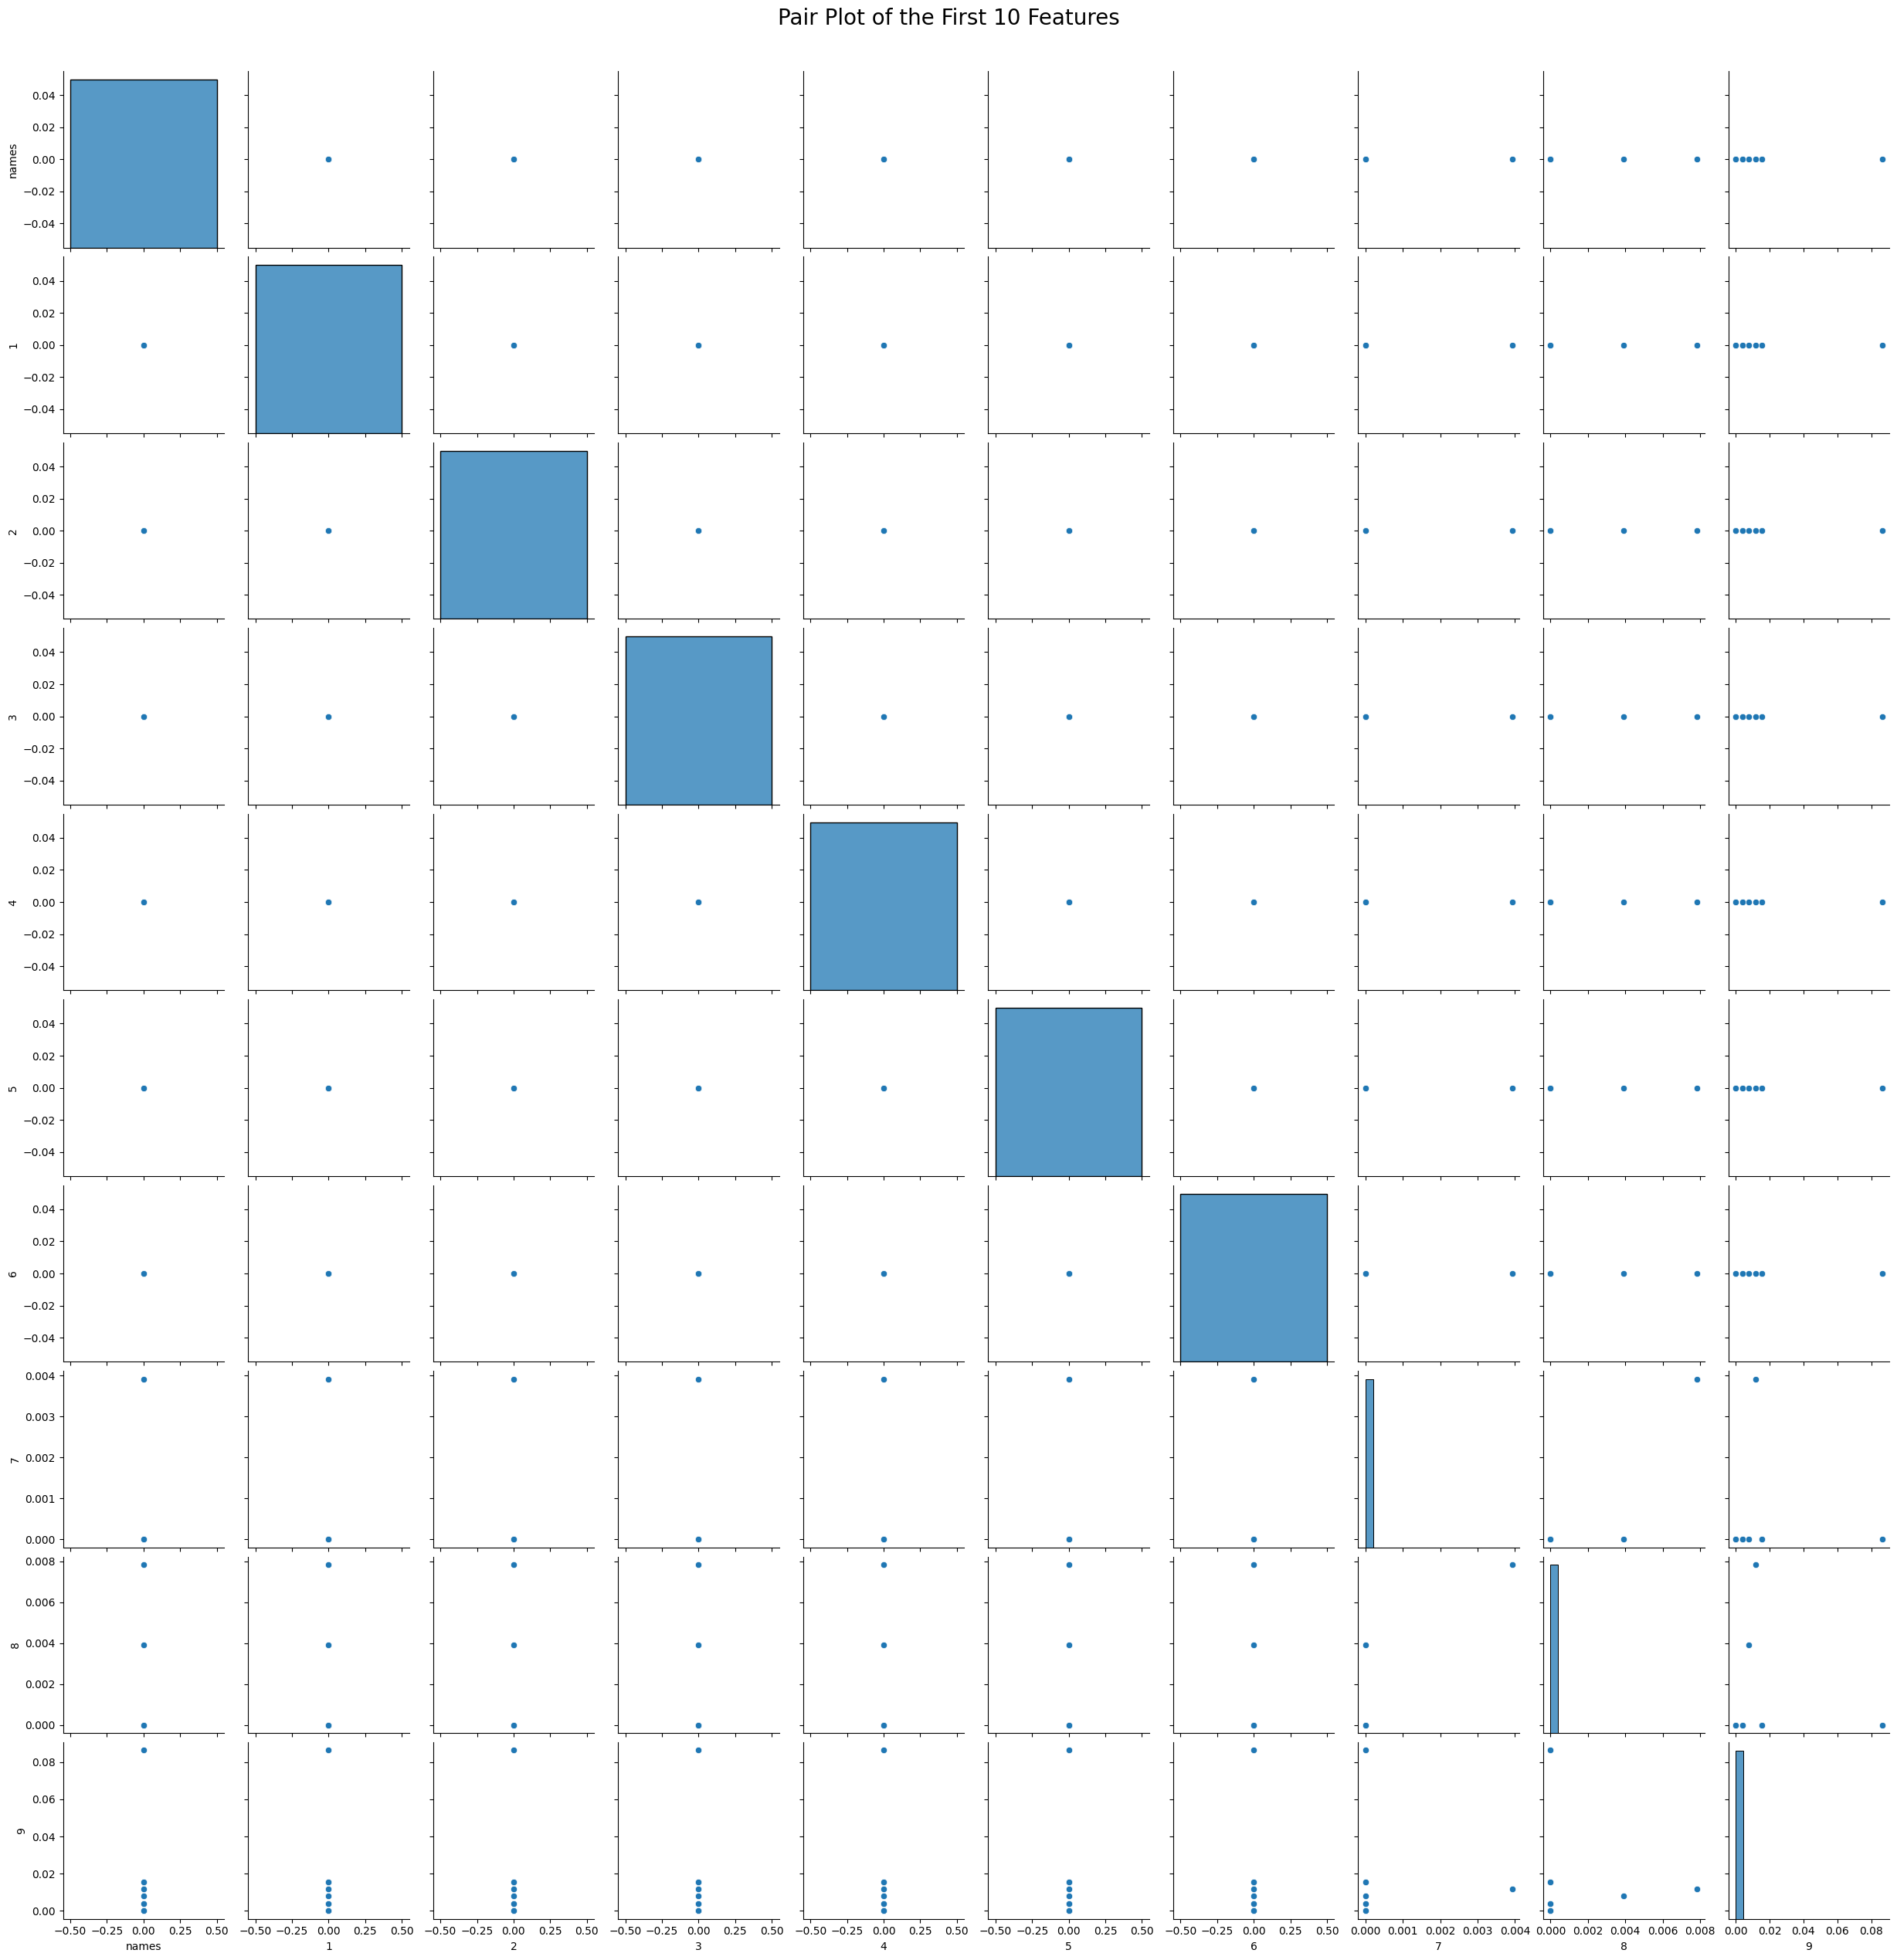

In [136]:
# Pair Plot for the first 10 features
sns.pairplot(X_train.iloc[:, :10]) 
plt.suptitle('Pair Plot of the First 10 Features', size=20, y=1.02)
plt.show()

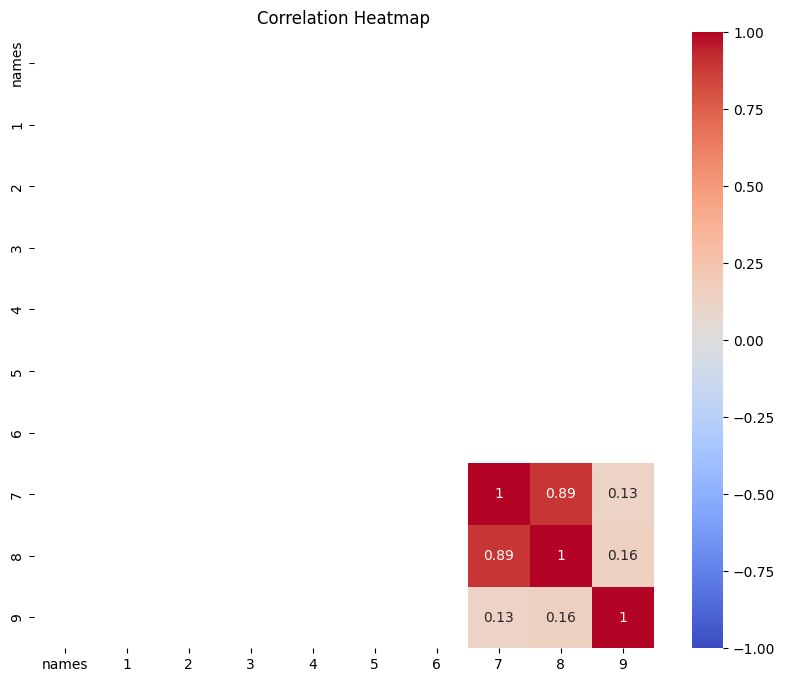

In [137]:
# Compute the correlation matrix
corr = X_train.iloc[:, :10].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

The 10x10 heatmap displays the degree of correlation between each pair of features, providing a rapid visual indicator based on color intensity and annotated values. Warmer colors (red) are associated with features with high positive correlation, cooler colors (blue) with significant negative correlation, and more neutral colors (white or light blue/red) with no correlation.

We can conclude that feature 7 and feature 8 have the highest correlation

In [138]:
#y_train and y_test are encoded into one-hot vectors using the OneHotEncoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(y_test.values.reshape(-1,1))

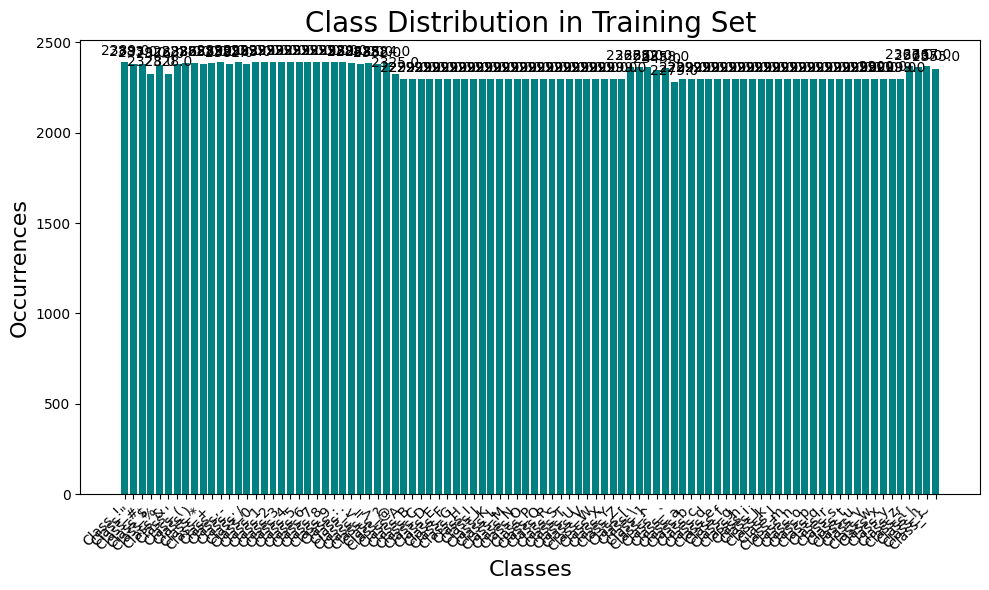

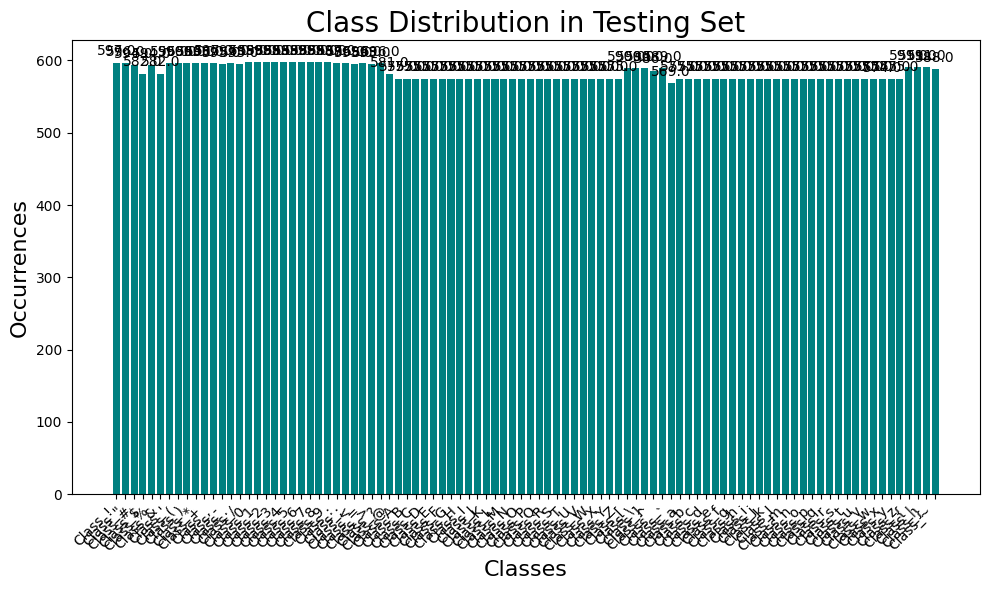

In [139]:
# Sum up occurrences of each class in the encoded arrays
y_train_sum = y_train_encoded.sum(axis=0)
y_test_sum = y_test_encoded.sum(axis=0)

# Get the class labels from the encoder
class_labels = enc.get_feature_names_out(input_features=['Class'])

def plot_class_distribution(class_sums, class_labels, title):
    """
    Plot the class distribution as a bar plot.
    
    Parameters:
    - class_sums: Array of sums of occurrences for each class
    - class_labels: Labels of the classes
    - title: Title for the plot
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(class_labels, class_sums, color='teal')
    
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Classes', fontsize=16)
    ax.set_ylabel('Occurrences', fontsize=16)
    ax.set_xticks(np.arange(len(class_labels)))
    ax.set_xticklabels(class_labels, rotation=45, ha="right")

    # Adding the text labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plotting class distribution for training and testing sets
plot_class_distribution(y_train_sum, class_labels, 'Class Distribution in Training Set')
plot_class_distribution(y_test_sum, class_labels, 'Class Distribution in Testing Set')

In [140]:
#Reshape the pixel data to (28, 28) format
# Assuming the extra feature is the last column, you can exclude it like this:
X_train_pixels = X_train.iloc[:, :-1]  # Exclude the last column
X_test_pixels = X_test.iloc[:, :-1]    # Exclude the last column

# Now, you can safely reshape the pixel data to (28, 28) format
X_train_norm = X_train_pixels.values.reshape(-1, 28, 28)
X_test_norm = X_test_pixels.values.reshape(-1, 28, 28)

The algorithm mentioned above prepares picture pixel data for machine learning, specifically for training and testing datasets. It removes the final column because it considers that every dataset has an extra feature in there that is unnecessary (like a label or an index). The remaining pixel data is then reshaped into an array of size 28x28, which is the standard size for MNIST images. Convolutional neural networks and other methods that require a two-dimensional input for each sample will not function with image data without this reshaping. Two sets of arrays (X_train_norm and X_test_norm) that are prepared for use in image processing tasks will be the outcome.

# **Convolutional Neural Network (CNN) construction for image classification**

In [145]:
model_new = Sequential([
    Reshape((28,28,1), input_shape=(28,28)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(no_of_classes, activation='softmax')
])

opt = Adam(learning_rate=0.001)

Using TensorFlow's Keras API, the code supplied above describes how to build a Convolutional Neural Network (CNN) for image classification tasks. This CNN architecture can identify patterns of different degrees of complexity because it was designed with image analysis in mind. In order to arrive at a final classification, the layers in the sequence are intended to methodically extract and evaluate the information included in the photos. Here is a glimpse into the design and operation of every part in the model:

**Conv2D Layer**: This layer performs 2D convolutional operations on the input data. In the context of image processing, it applies a filter (also known as a kernel) to the input image to extract features such as edges, textures, and patterns. The Conv2D layer is the fundamental building block of CNNs and is essential for learning hierarchical representations of visual data.

**Reshape Layer**: The reshape layer is used to reshape the input data into a desired shape. It's often used in CNN architectures to convert the output of one layer into a shape that is compatible with the input requirements of the next layer. For example, it can reshape the output of a convolutional layer into a format suitable for a fully connected (Dense) layer.

**BatchNormalization Layer**: Batch normalization is a technique used to improve the training of deep neural networks by normalizing the activations of each layer. It helps in reducing internal covariate shift, which can lead to faster training and better generalization. BatchNormalization layers are typically added after the convolutional or dense layers in a CNN.

**MaxPooling2D Layer**: Max pooling is a downsampling operation commonly used in CNNs to reduce the spatial dimensions of the feature maps while retaining the most important information. The MaxPooling2D layer divides the input feature maps into non-overlapping rectangular regions and outputs the maximum value from each region. This helps in reducing computational complexity and controlling overfitting.

**Dropout Layer**: Dropout is a regularization technique used to prevent overfitting in neural networks by randomly dropping out (setting to zero) a fraction of the units (neurons) in a layer during training. The Dropout layer helps in promoting independence between neurons, thus reducing the reliance of the network on specific features and improving its generalization ability.

**Flatten Layer**: The Flatten layer is used to convert the 2D feature maps into a 1D vector, which can be fed into a fully connected (Dense) layer for further processing. It essentially flattens the multi-dimensional output of the previous layer into a one-dimensional array.

**Dense Layers**: Dense layers, also known as fully connected layers, are used for learning non-linear transformations from the extracted features. Each neuron in a dense layer is connected to every neuron in the previous layer, allowing the network to learn complex mappings between the input and output. Dense layers are typically used at the end of the CNN architecture for classification or regression tasks.

**Optimizer (Adam)**: Adam is an optimization algorithm commonly used to update the weights of the neural network during training. It combines the ideas of momentum and adaptive learning rates to achieve faster convergence and better performance. Adam optimizer adjusts the learning rate for each parameter individually based on the past gradients and squared gradients. It is widely used in training CNNs due to its effectiveness and ease of use.



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_10 (Reshape)                 │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,726,654 (6.59 MB)

 Trainable params: 1,723,966 (6.58 MB)

 Non-trainable params: 2,688 (10.50 KB)

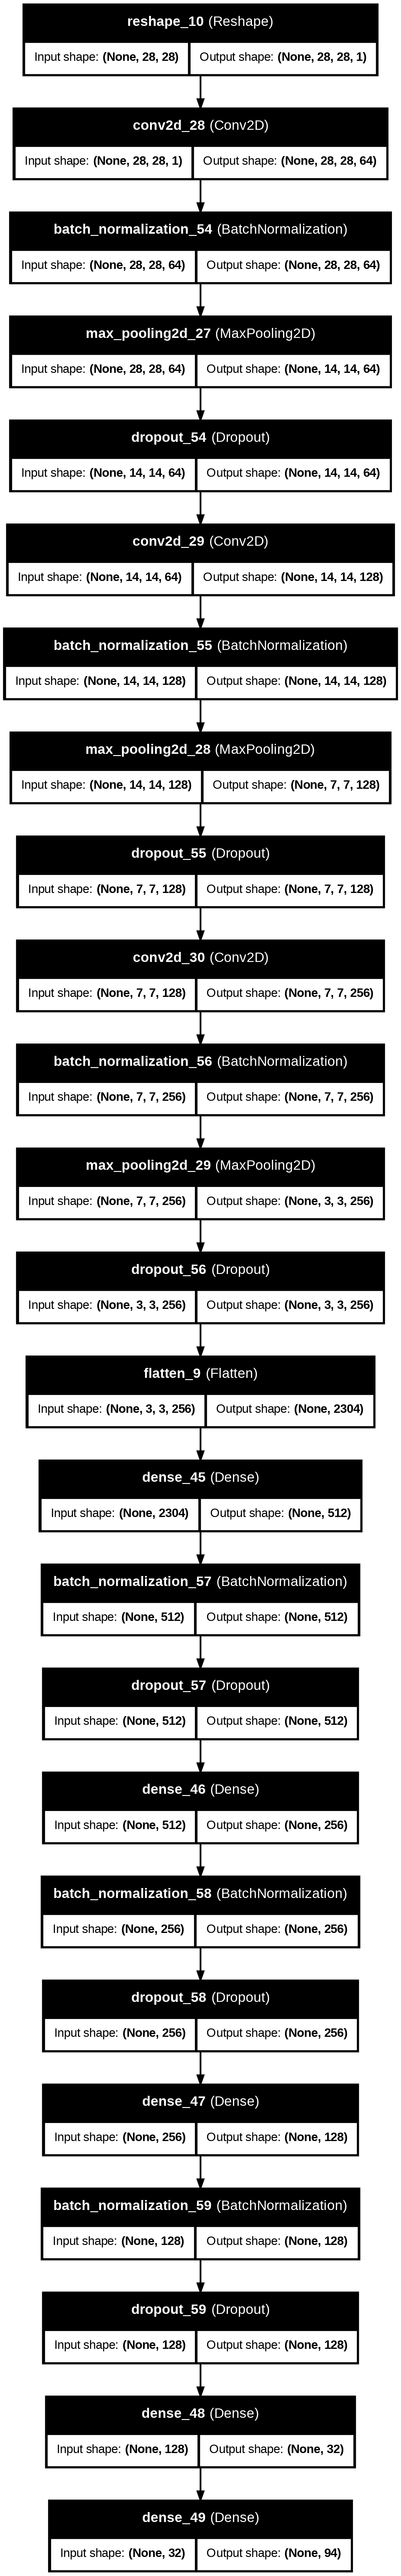

In [146]:
from tensorflow.keras.utils import plot_model
model_new.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_new.summary()

# For a graphical representation
plot_model(model_new, to_file='model_new.png', show_shapes=True, show_layer_names=True)

In [147]:
model_new.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_new.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_10 (Reshape)                 │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,726,654 (6.59 MB)

 Trainable params: 1,723,966 (6.58 MB)

 Non-trainable params: 2,688 (10.50 KB)

After compiling the model, invoking model_new.summary() prints a summary representation of the model. This summary includes:

The model's layers and types, arranged in a sequential manner.
Each layer's output shape demonstrates how the model changes the dimensions of the data. This represents the spatial dimensions and the depth of the feature maps for convolutional and pooling layers. It represents the total number of neurons in dense layers.
the total number of parameters (weights and biases) in the model as well as the number in each layer. Trainable layer parameters are subject to updates during training, and this count offers valuable information on the complexity and capability of the model.


In [ ]:
model_result = model_new.fit(X_train_norm, y_train_encoded, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 483s 313ms/step - accuracy: 0.8832 - loss: 0.3965 - val_accuracy: 0.9202 - val_loss: 0.2579
Epoch 2/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 464s 301ms/step - accuracy: 0.8959 - loss: 0.3510 - val_accuracy: 0.9220 - val_loss: 0.2576
Epoch 3/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 500s 300ms/step - accuracy: 0.9033 - loss: 0.3229 - val_accuracy: 0.9294 - val_loss: 0.2227
Epoch 4/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 470s 305ms/step - accuracy: 0.9088 - loss: 0.3031 - val_accuracy: 0.9302 - val_loss: 0.2253
Epoch 5/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 463s 301ms/step - accuracy: 0.9146 - loss: 0.2879 - val_accuracy: 0.9381 - val_loss: 0.2005
Epoch 6/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 468s 304ms/step - accuracy: 0.9169 - loss: 0.2746 - val_accuracy: 0.9383 - val_loss: 0.1970
Epoch 7/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 512s 310ms/step - accuracy: 0.9190 - loss: 0.2668 - val_accuracy: 0.9385 - val_loss: 0.1984
Epoch 8/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 542s 352ms/step - ac

X_train_norm: This is the normalized training data, typically features (input variables) of the dataset. It's used to train the neural network model.

y_train_encoded: This is the encoded training labels, which are the target variables or the labels corresponding to the training data. The labels are often one-hot encoded for classification tasks.

epochs=10: This specifies the number of times the entire training dataset will be passed forward and backward through the neural network during training. In this case, the training process will iterate over the entire training dataset 10 times.

validation_data=(X_test_norm, y_test_encoded): This argument specifies the validation data to be used during training. It's typically used to evaluate the model's performance on data that it hasn't seen during training, which helps in monitoring for overfitting. Here, X_test_norm is the normalized test data and y_test_encoded is the encoded test labels.

verbose=1: This argument controls the verbosity of the training process. Setting verbose=1 means that progress bars will be displayed during training, showing the number of epochs completed and the training and validation metrics.

batch_size=128: This specifies the number of samples that will be propagated through the network at a time. In this case, the training data will be divided into batches of 128 samples each, and the model's weights will be updated after processing each batch.

In [152]:
score = model_new.evaluate(X_train_norm,y_train_encoded, batch_size = 64,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:94.71000000000001%


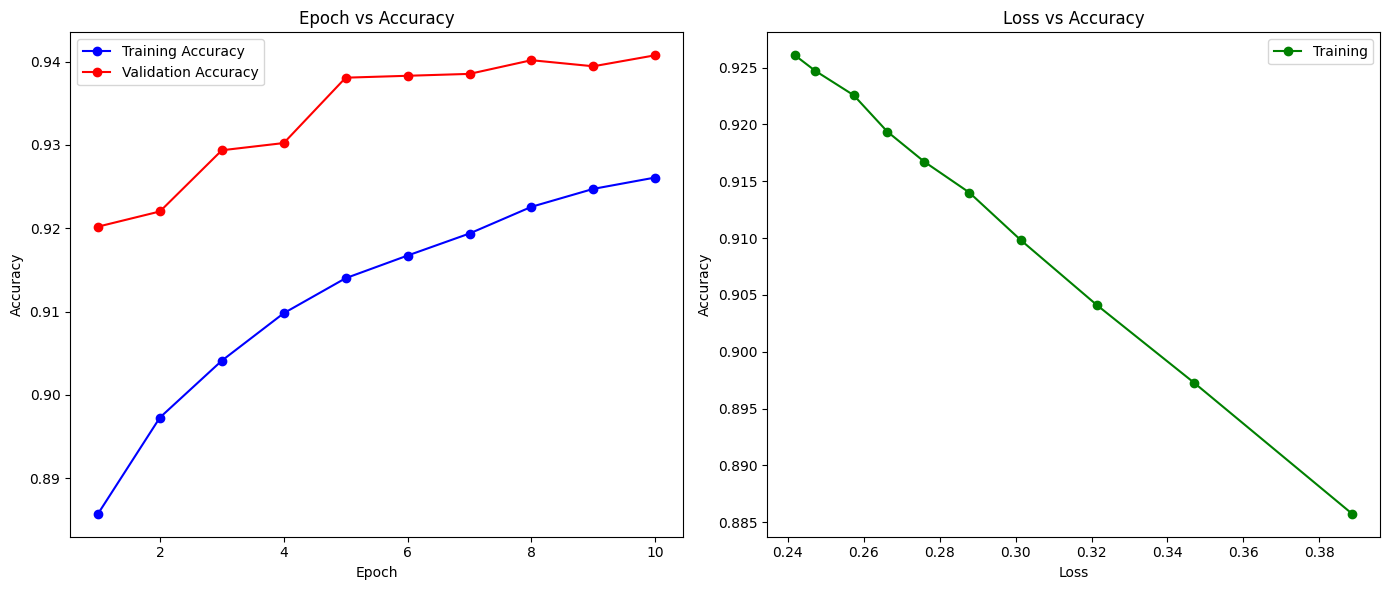

In [153]:
# Extracting values from the history object
epochs = range(1, len(model_result.history['accuracy']) + 1)
train_accuracy = model_result.history['accuracy']
val_accuracy = model_result.history['val_accuracy']
train_loss = model_result.history['loss']

# Plotting Epoch vs Accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss vs Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(train_loss, train_accuracy, 'go-', label='Training')
plt.title('Loss vs Accuracy')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The neural network model's training history is plotted in the script above:

From the model_history.history object, it retrieves the epoch count, training accuracy, validation accuracy, and training loss.


There are two plots made side by side. The model's performance on the training and validation datasets improves with each epoch, as seen in the first plot, which displays the accuracy of the training and validation runs across each epoch.

Understanding how a decrease in loss is connected to an increase in accuracy during training is made easier by looking at the relationship between training loss and training accuracy in the second plot.


# **Conclusion**

The dataset comprises a vast collection of images, totaling 281,000 samples, forming the backbone for training machine learning models specialized in character recognition tasks.

Data preprocessing encompasses several steps, including the exclusion of non-numeric features, conversion of columns to numeric values while handling errors by converting them to NaN, managing NaN values by filling them with zeros, and normalizing pixel values to a range between 0 and 1.

The dataset is divided into training and testing sets, ensuring an equitable distribution of class instances across both partitions, a visual representation of which is depicted through pie charts.

A Convolutional Neural Network (CNN) architecture is crafted for image classification, integrating essential layers such as Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, and Dropout. The model is optimized using the Adam optimizer and trained with the categorical_crossentropy loss function.

Model training entails iterative epochs over the dataset, resulting in commendable accuracy rates. The training and validation accuracies are systematically tracked and visualized through epoch-wise progress plots.

One-hot encoding is employed to encode the target variables (y_train and y_test), ensuring compatibility with the model training process.

Pixel data undergoes reshaping to adhere to a (28, 28) format, aligning with the required input dimensions for the CNN architecture.

The trained model achieves a robust accuracy score, boasting a notable **94.71% accuracy** on the training set.

# **References**
- https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939
- https://www.researchgate.net/figure/A-Convolutional-neural-network-sequence-to-classify-handwritten-digits_fig5_364953720
- https://www.youtube.com/watch?v=9cPMFTwBdM4&ab_channel=Ductileasy
- https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard
- https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel


# **Licenses:**
Dataset : https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters/data

MIT License

Copyright (c) 2025 Apoorv Dhaygude

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
